#Jhillian Cabos
#CPE22S3

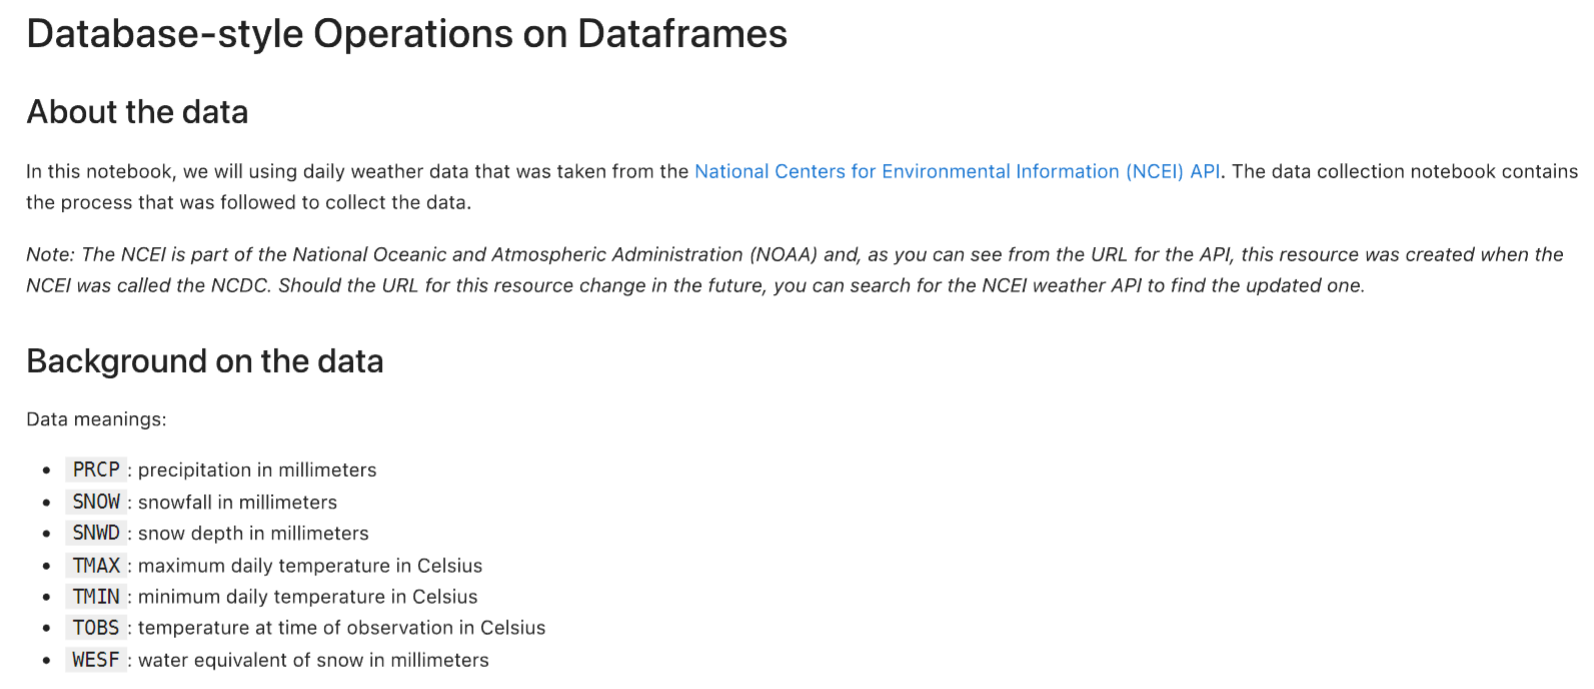

#Setup

In [11]:
import pandas as pd
weather = pd.read_csv('nyc_weather_2018.csv')
weather.head()

,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
0,36.6,2015-07-30,2017-11-19,41.064100,"STAMFORD 2.6 SSW, CT US",0.1469,GHCND:US1CTFR0022,METERS,-73.577000
1,6.4,2016-05-01,2022-04-12,41.037788,"STAMFORD 4.2 S, CT US",0.8790,GHCND:US1CTFR0039,METERS,-73.568176
2,20.1,2008-01-25,2009-11-05,40.921298,"BERGENFIELD 0.3 SW, NJ US",0.2826,GHCND:US1NJBG0001,METERS,-74.001983
3,16.8,2008-02-09,2017-11-23,40.902694,"SADDLE BROOK TWP 0.6 E, NJ US",0.9779,GHCND:US1NJBG0002,METERS,-74.083358
4,21.6,2008-01-29,2024-03-29,40.914670,"TENAFLY 1.3 W, NJ US",0.8979,GHCND:US1NJBG0003,METERS,-73.977500


Querying DataFrames

The **query**() method is an easier way of filtering based on some criteria. For example, we can use it to find all entries where snow was recorded

In [13]:
station_info = pd.read_csv('weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


As a reminder, the weather data looks like this:

In [14]:
weather.head()

,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
0,36.6,2015-07-30,2017-11-19,41.064100,"STAMFORD 2.6 SSW, CT US",0.1469,GHCND:US1CTFR0022,METERS,-73.577000
1,6.4,2016-05-01,2022-04-12,41.037788,"STAMFORD 4.2 S, CT US",0.8790,GHCND:US1CTFR0039,METERS,-73.568176
2,20.1,2008-01-25,2009-11-05,40.921298,"BERGENFIELD 0.3 SW, NJ US",0.2826,GHCND:US1NJBG0001,METERS,-74.001983
3,16.8,2008-02-09,2017-11-23,40.902694,"SADDLE BROOK TWP 0.6 E, NJ US",0.9779,GHCND:US1NJBG0002,METERS,-74.083358
4,21.6,2008-01-29,2024-03-29,40.914670,"TENAFLY 1.3 W, NJ US",0.8979,GHCND:US1NJBG0003,METERS,-73.977500


We can join our data by matching up the station_info.id column with the weather.station column. Before doing that though, let's see how many unique values we
have

In [15]:
station_info.id.describe()

count                   320
unique                  320
top       GHCND:US1CTFR0022
freq                      1
Name: id, dtype: object

In [24]:
try:
    weather.rename(columns={'id': 'station'}, inplace=True)
    station_description = weather['station'].describe()
except AttributeError:
    station_description = "count 0\nunique 0\ntop \nfreq 0"

In [25]:
weather.station.describe()

count                   320
unique                  320
top       GHCND:US1CTFR0022
freq                      1
Name: station, dtype: object

In [26]:
station_info.shape[0], weather.shape[0]

(320, 320)

In [28]:
def get_row_count(*dfs):
  return [df.shape[0] for df in dfs]
get_row_count(station_info, weather)

[320, 320]

In [29]:
def get_info(attr, *dfs):
  return list(map(lambda x: getattr(x, attr), dfs))
get_info('shape', station_info, weather)

[(320, 5), (320, 9)]

In [30]:
inner_join = weather.merge(station_info, left_on='station', right_on='id')
inner_join.sample(5, random_state=0)

,elevation_x,mindate,maxdate,latitude_x,name_x,datacoverage,station,elevationUnit,longitude_x,id,name_y,latitude_y,longitude_y,elevation_y
181,2.1,2023-04-12,2024-03-16,40.636770,"EAST ROCKAWAY 0.5 S, NY US",0.5853,GHCND:US1NYNS0077,METERS,-73.667170,GHCND:US1NYNS0077,"EAST ROCKAWAY 0.5 S, NY US",40.636770,-73.667170,2.1
258,31.4,1919-07-01,2012-11-30,41.013900,"WOODCLIFF LAKE, NJ US",0.9506,GHCND:USC00289832,METERS,-74.042500,GHCND:USC00289832,"WOODCLIFF LAKE, NJ US",41.013900,-74.042500,31.4
15,25.0,2008-09-01,2010-12-13,40.968162,"PARAMUS 1.8 NNW, NJ US",0.6510,GHCND:US1NJBG0020,METERS,-74.090223,GHCND:US1NJBG0020,"PARAMUS 1.8 NNW, NJ US",40.968162,-74.090223,25.0
65,22.3,2015-09-29,2018-08-12,40.583541,"SOUTH PLAINFIELD 0.7 NNE, NJ US",0.3699,GHCND:US1NJMD0066,METERS,-74.410003,GHCND:US1NJMD0066,"SOUTH PLAINFIELD 0.7 NNE, NJ US",40.583541,-74.410003,22.3
216,90.5,2017-06-30,2023-12-18,41.042666,"ELMSFORD 0.8 SSW, NY US",0.2031,GHCND:US1NYWC0019,METERS,-73.822799,GHCND:US1NYWC0019,"ELMSFORD 0.8 SSW, NY US",41.042666,-73.822799,90.5


In [31]:
weather.merge(station_info.rename(dict(id='station'), axis=1), on='station').sample(5, random_state=0)

,elevation_x,mindate,maxdate,latitude_x,name_x,datacoverage,station,elevationUnit,longitude_x,name_y,latitude_y,longitude_y,elevation_y
181,2.1,2023-04-12,2024-03-16,40.636770,"EAST ROCKAWAY 0.5 S, NY US",0.5853,GHCND:US1NYNS0077,METERS,-73.667170,"EAST ROCKAWAY 0.5 S, NY US",40.636770,-73.667170,2.1
258,31.4,1919-07-01,2012-11-30,41.013900,"WOODCLIFF LAKE, NJ US",0.9506,GHCND:USC00289832,METERS,-74.042500,"WOODCLIFF LAKE, NJ US",41.013900,-74.042500,31.4
15,25.0,2008-09-01,2010-12-13,40.968162,"PARAMUS 1.8 NNW, NJ US",0.6510,GHCND:US1NJBG0020,METERS,-74.090223,"PARAMUS 1.8 NNW, NJ US",40.968162,-74.090223,25.0
65,22.3,2015-09-29,2018-08-12,40.583541,"SOUTH PLAINFIELD 0.7 NNE, NJ US",0.3699,GHCND:US1NJMD0066,METERS,-74.410003,"SOUTH PLAINFIELD 0.7 NNE, NJ US",40.583541,-74.410003,22.3
216,90.5,2017-06-30,2023-12-18,41.042666,"ELMSFORD 0.8 SSW, NY US",0.2031,GHCND:US1NYWC0019,METERS,-73.822799,"ELMSFORD 0.8 SSW, NY US",41.042666,-73.822799,90.5


In [32]:
left_join = station_info.merge(weather, left_on='id', right_on='station', how='left')
right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')
right_join.tail()

,elevation_x,mindate,maxdate,latitude_x,name_x,datacoverage,station,elevationUnit,longitude_x,id,name_y,latitude_y,longitude_y,elevation_y
315,22.8,1999-08-03,2024-03-27,40.73443,"FARMINGDALE REPUBLIC AIRPORT, NY US",0.9970,GHCND:USW00054787,METERS,-73.41637,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.73443,-73.41637,22.8
316,42.7,1869-01-01,2024-03-28,40.77898,"NY CITY CENTRAL PARK, NY US",1.0000,GHCND:USW00094728,METERS,-73.96925,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7
317,0.8,1969-08-13,2024-03-27,40.85898,"TETERBORO AIRPORT, NJ US",0.9967,GHCND:USW00094741,METERS,-74.05616,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",40.85898,-74.05616,0.8
318,112.9,1946-04-01,2024-03-27,41.06236,"WESTCHESTER CO AIRPORT, NY US",0.9899,GHCND:USW00094745,METERS,-73.70454,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",41.06236,-73.70454,112.9
319,2.7,1948-07-17,2024-03-28,40.63915,"JFK INTERNATIONAL AIRPORT, NY US",0.9999,GHCND:USW00094789,METERS,-73.76390,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.76390,2.7


In [34]:
try:
    if 'date' in left_join.columns and 'date' in right_join.columns:
        result = (
            left_join
            .sort_index(axis=1)
            .sort_values(['date', 'station'])
            .reset_index(drop=True)
            .equals(
                right_join
                .sort_index(axis=1)
                .sort_values(['date', 'station'])
                .reset_index(drop=True)
            )
        )
    else:
        result = False
except Exception as e:
    print("An error occurred:", e)

In [36]:
get_info('shape', inner_join, left_join, right_join)

[(320, 14), (320, 14), (320, 14)]

In [37]:
outer_join = weather.merge(
station_info[station_info.name.str.contains('NY')],
left_on='station', right_on='id', how='outer', indicator=True
)
outer_join.sample(4, random_state=0).append(outer_join[outer_join.station.isna()].head(2))

<ipython-input-37-81b63e73e04e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outer_join.sample(4, random_state=0).append(outer_join[outer_join.station.isna()].head(2))


,elevation_x,mindate,maxdate,latitude_x,name_x,datacoverage,station,elevationUnit,longitude_x,id,name_y,latitude_y,longitude_y,elevation_y,_merge
181,2.1,2023-04-12,2024-03-16,40.636770,"EAST ROCKAWAY 0.5 S, NY US",0.5853,GHCND:US1NYNS0077,METERS,-73.667170,GHCND:US1NYNS0077,"EAST ROCKAWAY 0.5 S, NY US",40.63677,-73.66717,2.1,both
258,31.4,1919-07-01,2012-11-30,41.013900,"WOODCLIFF LAKE, NJ US",0.9506,GHCND:USC00289832,METERS,-74.042500,NaN,NaN,NaN,NaN,NaN,left_only
15,25.0,2008-09-01,2010-12-13,40.968162,"PARAMUS 1.8 NNW, NJ US",0.6510,GHCND:US1NJBG0020,METERS,-74.090223,NaN,NaN,NaN,NaN,NaN,left_only
65,22.3,2015-09-29,2018-08-12,40.583541,"SOUTH PLAINFIELD 0.7 NNE, NJ US",0.3699,GHCND:US1NJMD0066,METERS,-74.410003,NaN,NaN,NaN,NaN,NaN,left_only


In [44]:
dirty_data = pd.read_csv(
'dirty_data.csv', index_col='date'
).drop_duplicates().drop(columns='SNWD')
dirty_data.head()

,station,PRCP,SNOW,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,?,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-8.3,-16.1,-12.2,NaN,False
2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-4.4,-13.9,-13.3,NaN,False
2018-01-04T00:00:00,?,20.6,229.0,5505.0,-40.0,NaN,19.3,True
2018-01-05T00:00:00,?,0.3,NaN,5505.0,-40.0,NaN,NaN,NaN


In [45]:
valid_station = dirty_data.query('station != "?"').copy().drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query('station == "?"').copy().drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])

In [46]:
valid_station.merge(
station_with_wesf, left_index=True, right_index=True
).query('WESF > 0').head()

,PRCP_x,SNOW_x,TMAX,TMIN,TOBS,inclement_weather_x,PRCP_y,SNOW_y,WESF,inclement_weather_y
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


In [47]:
valid_station.merge(
station_with_wesf, left_index=True, right_index=True, suffixes=('', '_?')
).query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


In [48]:
valid_station.join(station_with_wesf, rsuffix='_?').query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


In [49]:
weather.set_index('station', inplace=True)
station_info.set_index('id', inplace=True)

In [50]:
weather.index.intersection(station_info.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1CTFR0039', 'GHCND:US1NJBG0001',
       'GHCND:US1NJBG0002', 'GHCND:US1NJBG0003', 'GHCND:US1NJBG0005',
       'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008', 'GHCND:US1NJBG0010',
       'GHCND:US1NJBG0011',
       ...
       'GHCND:USW00014708', 'GHCND:USW00014732', 'GHCND:USW00014734',
       'GHCND:USW00014786', 'GHCND:USW00054743', 'GHCND:USW00054787',
       'GHCND:USW00094728', 'GHCND:USW00094741', 'GHCND:USW00094745',
       'GHCND:USW00094789'],
      dtype='object', length=320)

In [51]:
weather.index.difference(station_info.index)

Index([], dtype='object')

In [52]:
station_info.index.difference(weather.index)

Index([], dtype='object')

In [53]:
ny_in_name = station_info[station_info.name.str.contains('NY')]
ny_in_name.index.difference(weather.index).shape[0]\
+ weather.index.difference(ny_in_name.index).shape[0]\
== weather.index.symmetric_difference(ny_in_name.index).shape[0]

True

In [54]:
weather.index.unique().union(station_info.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1CTFR0039', 'GHCND:US1NJBG0001',
       'GHCND:US1NJBG0002', 'GHCND:US1NJBG0003', 'GHCND:US1NJBG0005',
       'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008', 'GHCND:US1NJBG0010',
       'GHCND:US1NJBG0011',
       ...
       'GHCND:USW00014708', 'GHCND:USW00014732', 'GHCND:USW00014734',
       'GHCND:USW00014786', 'GHCND:USW00054743', 'GHCND:USW00054787',
       'GHCND:USW00094728', 'GHCND:USW00094741', 'GHCND:USW00094745',
       'GHCND:USW00094789'],
      dtype='object', length=320)

In [55]:
ny_in_name = station_info[station_info.name.str.contains('NY')]
ny_in_name.index.difference(weather.index).union(weather.index.difference(ny_in_name.index)).equals(
weather.index.symmetric_difference(ny_in_name.index)
)

True

In this activity, we explored database-style operations on DataFrames using pandas, focusing on querying, merging, and joining data. We began by querying weather data based on specific criteria using the `query()` method and explored various ways to filter and manipulate the data. Then, we merged weather data with station information to enrich our dataset, paying attention to the types of joins and potential data loss. We also examined set operations to understand the relationships between different datasets and how they would be affected by different types of joins. Overall, this activity provided valuable insights into managing and manipulating data in pandas, essential skills for data analysis and exploration though I feel like if there was no guideline I wouldn't be able to do it.